# Legend:
# Header
## Secondary Header (Give more info)
    /#/ comment on what the give code is doing
    Markdown no # My comments to help understand how to use the data
#### Step by step analysis

# Step 1: Import and sort the data by data type and data category

## Problem Statement: Build a predictive model and find out the sales of each product at a particular store AS OF DATA IN 2013

In [1]:
import pandas as pd
from pandas import Series, DataFrame
import numpy as np
from matplotlib import pyplot as plt
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
%matplotlib inline

train = pd.read_csv('bigmartsalestrain.csv')
test = pd.read_csv('bigmartsalestest.csv')

In [2]:
df = pd.concat([train], ignore_index=True, sort=True)

    Variable Type
        Predictor Variables: Item_Weight, Item_Fat_Content, Item_Visibility, Item_Type, Item_MRP, Outlet_Establishment_Year, Outlet_Size, Outlet_Location_Type, Outlet_Type, Outlet_Identifier, Item_Identifier
        Target Variables: Item_Outlet_Sales

    Data Types
        Categorical: Item_Fat_Content, Item_Type, Outlet_Size, Outlet_Location_Type, Outlet_Type
        Continuous: Item_Weight, Item_Visibility, Item_MRP, Outlet_Establishment_Year, Item_Outlet_Sales

# Step 2: Raw Data Analysis

## Step 2.1 Understanding the various features of the dataset (visualizing data and finding extremes) and fill in null values

In [3]:
# Summary of numeric values
df.describe()

,Item_MRP,Item_Outlet_Sales,Item_Visibility,Item_Weight,Outlet_Establishment_Year
count,8523.000000,8523.000000,8523.000000,7060.000000,8523.000000
mean,140.992782,2181.288914,0.066132,12.857645,1997.831867
std,62.275067,1706.499616,0.051598,4.643456,8.371760
min,31.290000,33.290000,0.000000,4.555000,1985.000000
25%,93.826500,834.247400,0.026989,8.773750,1987.000000
50%,143.012800,1794.331000,0.053931,12.600000,1999.000000
75%,185.643700,3101.296400,0.094585,16.850000,2004.000000
max,266.888400,13086.964800,0.328391,21.350000,2009.000000


In [4]:
df.head(10)

,Item_Fat_Content,Item_Identifier,Item_MRP,Item_Outlet_Sales,Item_Type,Item_Visibility,Item_Weight,Outlet_Establishment_Year,Outlet_Identifier,Outlet_Location_Type,Outlet_Size,Outlet_Type
0,Low Fat,FDA15,249.8092,3735.1380,Dairy,0.016047,9.300,1999,OUT049,Tier 1,Medium,Supermarket Type1
1,Regular,DRC01,48.2692,443.4228,Soft Drinks,0.019278,5.920,2009,OUT018,Tier 3,Medium,Supermarket Type2
2,Low Fat,FDN15,141.6180,2097.2700,Meat,0.016760,17.500,1999,OUT049,Tier 1,Medium,Supermarket Type1
3,Regular,FDX07,182.0950,732.3800,Fruits and Vegetables,0.000000,19.200,1998,OUT010,Tier 3,NaN,Grocery Store
4,Low Fat,NCD19,53.8614,994.7052,Household,0.000000,8.930,1987,OUT013,Tier 3,High,Supermarket Type1
5,Regular,FDP36,51.4008,556.6088,Baking Goods,0.000000,10.395,2009,OUT018,Tier 3,Medium,Supermarket Type2
6,Regular,FDO10,57.6588,343.5528,Snack Foods,0.012741,13.650,1987,OUT013,Tier 3,High,Supermarket Type1
7,Low Fat,FDP10,107.7622,4022.7636,Snack Foods,0.127470,NaN,1985,OUT027,Tier 3,Medium,Supermarket Type3
8,Regular,FDH17,96.9726,1076.5986,Frozen Foods,0.016687,16.200,2002,OUT045,Tier 2,NaN,Supermarket Type1
9,Regular,FDU28,187.8214,4710.5350,Frozen Foods,0.094450,19.200,2007,OUT017,Tier 2,NaN,Supermarket Type1


In [5]:
#Find out how many categories have null values

df.isnull().sum()

Item_Fat_Content                0
Item_Identifier                 0
Item_MRP                        0
Item_Outlet_Sales               0
Item_Type                       0
Item_Visibility                 0
Item_Weight                  1463
Outlet_Establishment_Year       0
Outlet_Identifier               0
Outlet_Location_Type            0
Outlet_Size                  2410
Outlet_Type                     0
dtype: int64

#### Both Item_Weight and Outlet_size have many missing values, Fill them with mean or missing

In [6]:
#Replace Missing Values for Item_Weight
mean = df['Item_Weight'].mean()
item_weight_missing = df['Item_Weight'].isnull()
df.loc[item_weight_missing, 'Item_Weight'] = mean

#Replace Missing Values for Outlet_Size
missing = df['Outlet_Size'].isnull()
outlet_size_missing = df['Outlet_Size'].isnull()
df.loc[outlet_size_missing, 'Outlet_Size'] = missing

In [7]:
#Check to make sure nulls are gone
df.isnull().sum()

Item_Fat_Content             0
Item_Identifier              0
Item_MRP                     0
Item_Outlet_Sales            0
Item_Type                    0
Item_Visibility              0
Item_Weight                  0
Outlet_Establishment_Year    0
Outlet_Identifier            0
Outlet_Location_Type         0
Outlet_Size                  0
Outlet_Type                  0
dtype: int64

## Step 2.2 Understanding distribution of numerical variables

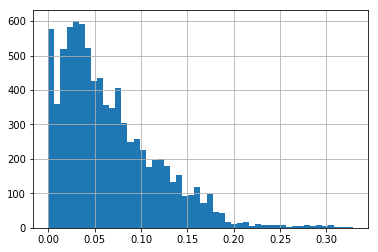

In [8]:
#Box Plot for understanding distributions and outliers
df['Item_Visibility'].hist(bins=50)

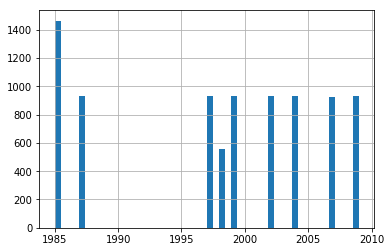

In [9]:
df['Outlet_Establishment_Year'].hist(bins=50)

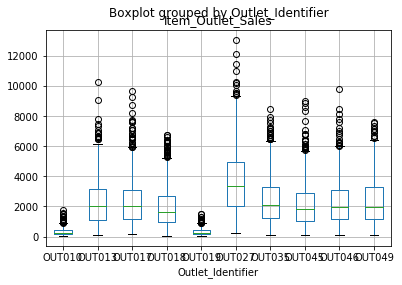

In [10]:
df.boxplot(column='Item_Outlet_Sales', by='Outlet_Identifier')

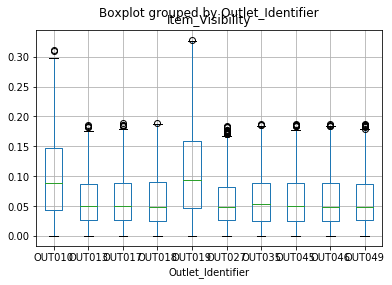

In [11]:
df.boxplot(column='Item_Visibility', by='Outlet_Identifier')

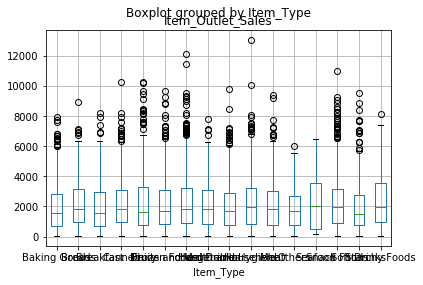

In [12]:
df.boxplot(column='Item_Outlet_Sales', by='Item_Type')

## Other Data Values

In [13]:
#Get the unique values and their frequency for Item_Type, Item_Fat_Content, Outlet_Identifier

df['Item_Type'].value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

In [14]:
df['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [15]:
df['Outlet_Identifier'].value_counts()

OUT027    935
OUT013    932
OUT049    930
OUT046    930
OUT035    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: Outlet_Identifier, dtype: int64

In [16]:
df['Item_Identifier'].value_counts()

FDW13    10
FDG33    10
FDQ40     9
NCY18     9
FDX31     9
FDO19     9
FDF56     9
FDW49     9
FDF52     9
NCJ30     9
NCF42     9
FDX04     9
FDP25     9
FDV38     9
DRN47     9
NCQ06     9
NCI54     9
FDW26     9
FDV60     9
FDX20     9
DRE49     9
NCL31     9
FDG09     9
FDT07     9
FDU12     9
NCB18     9
FDD38     9
FDV09     8
NCB31     8
DRP35     8
         ..
FDH22     2
NCS41     2
FDW10     2
FDM38     2
NCW30     2
FDD22     2
FDE38     2
FDR03     2
FDE39     2
DRG25     2
DRE01     2
NCX53     2
FDU09     2
FDB47     2
FDA48     2
FDT33     2
FDF38     2
NCM42     2
DRL59     2
FDR57     2
NCG19     2
DRF48     1
FDO33     1
FDE52     1
FDN52     1
FDK57     1
FDC23     1
FDQ60     1
FDT35     1
FDY43     1
Name: Item_Identifier, Length: 1559, dtype: int64

## Step 2.3 Understanding distributions of variables

In [17]:
pd.crosstab(df['Outlet_Identifier'], df['Item_Type'], margins=True)

Item_Type,Baking Goods,Breads,Breakfast,Canned,Dairy,Frozen Foods,Fruits and Vegetables,Hard Drinks,Health and Hygiene,Household,Meat,Others,Seafood,Snack Foods,Soft Drinks,Starchy Foods,All
Outlet_Identifier,,,,,,,,,,,,,,,,,
OUT010,42,17,9,35,43,54,79,16,37,67,34,10,4,71,28,9,555
OUT013,73,25,13,65,80,92,142,23,61,103,41,16,5,125,49,19,932
OUT017,73,22,12,69,74,106,127,22,61,95,44,16,5,128,54,18,926
OUT018,68,27,12,78,73,92,135,22,58,95,46,20,7,132,46,17,928
OUT019,43,16,10,38,49,49,73,8,30,52,32,17,6,75,26,4,528
OUT027,69,31,11,72,67,89,140,23,60,99,56,15,7,137,45,14,935
OUT035,68,29,10,79,71,92,129,22,50,102,43,16,8,140,52,19,930
OUT045,70,33,10,74,69,81,143,28,55,99,38,20,9,133,51,16,929
OUT046,76,26,10,72,78,108,126,20,56,103,44,22,6,120,48,15,930


In [18]:
pd.crosstab(df['Outlet_Type'], df['Outlet_Location_Type'], margins=True)

Outlet_Location_Type,Tier 1,Tier 2,Tier 3,All
Outlet_Type,,,,
Grocery Store,528,0,555,1083
Supermarket Type1,1860,2785,932,5577
Supermarket Type2,0,0,928,928
Supermarket Type3,0,0,935,935
All,2388,2785,3350,8523


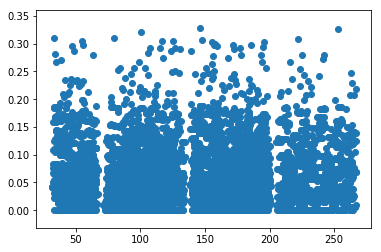

In [19]:
plt.scatter(df['Item_MRP'], df['Item_Visibility'])

## Step 2.4 Feature Engineering

#### Item_Visibility (how much is in stock in the stores) attribute has a minimum value of 0. Consider it as missing information and impute it with the mean visibility of that product.

In [20]:
item_visibility_zero = df['Item_Visibility'] == 0
mean_visibility = df['Item_Visibility'].mean()
df.loc[item_visibility_zero, 'Item_Visibility'] = mean_visibility

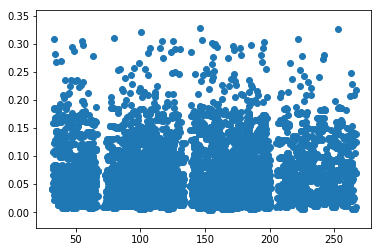

In [21]:
#New graph without values of 0
plt.scatter(df['Item_MRP'], df['Item_Visibility'])

#### Create new variables: Item_visibility_meanratio, Item_type_combined, Outlet_years

In [22]:
#Determine another variable with means ratio
df['Item_Visibility_MeanRatio'] = (df["Item_Visibility"]/mean_visibility)
df['Item_Visibility_MeanRatio'].describe()

count    8523.000000
mean        1.061715
std         0.737033
min         0.054054
25%         0.500292
50%         0.945330
75%         1.430249
max         4.965687
Name: Item_Visibility_MeanRatio, dtype: float64

In [23]:
#Get the first two characters of ID
df['Item_Type_Combined'] = df['Item_Identifier'].apply(lambda x: x[0:2])
#Rename them to more intuitive categories
df['Item_Type_Combined'] = df['Item_Type_Combined'].map({'FD':'Food', 'NC':'Non-Consumable', 'DR':'Drinks'})
df['Item_Type_Combined'].value_counts()

Food              6125
Non-Consumable    1599
Drinks             799
Name: Item_Type_Combined, dtype: int64

In [24]:
#Years
df['Outlet_Years'] = 2013 - df['Outlet_Establishment_Year']
df['Outlet_Years'].describe()

count    8523.000000
mean       15.168133
std         8.371760
min         4.000000
25%         9.000000
50%        14.000000
75%        26.000000
max        28.000000
Name: Outlet_Years, dtype: float64

#### Normalize all the low fat and regular categories

In [25]:
#Change categories of Low Fat
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace({'LF':'Low Fat', 'reg':'Regular', 'low fat':'Low Fat'})
df['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

#### From Item_Fat_Content, separate Low Fat categorry and Non-consumable as Non-Edible

In [26]:
#Mark non-consumables as separate category in low_fat
df.loc[df['Item_Type_Combined']=='Non-Consumable','Item_Fat_Content'] = 'Non-Edible'
df['Item_Fat_Content'].value_counts()

Low Fat       3918
Regular       3006
Non-Edible    1599
Name: Item_Fat_Content, dtype: int64

# Step 3: One Hot Encoding to make a less error-prone model

### 3.1 Generate binary onehot features

In [27]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Outlet'] = le.fit_transform(df['Outlet_Identifier'])
df_onehot = df.copy()
df_onehot = pd.get_dummies(df_onehot, columns=['Item_Fat_Content','Outlet_Location_Type','Outlet_Size','Outlet_Type',
                             'Item_Type_Combined','Outlet_Identifier', 'Item_Type'])
df = df_onehot

#### Using Label encoding(seemingly less accurate):

In [ ]:
#categoric = ['Item_Fat_Content','Outlet_Location_Type','Outlet_Size','Outlet_Type',
#                              'Item_Type_Combined','Outlet_Identifier']
#for var in categoric:
#    df[var]=le.fit_transform(df[var].astype('str'))
#df.dtypes

#### Or Dummies

In [29]:
#mylist = list(train1.select_dtypes(include=['object']).columns) 
#dummies = pd.get_dummies(train[mylist], prefix= mylist) 
#train.drop(mylist, axis=1, inplace = True)  
#X = pd.concat([train,dummies], axis =1 )

### 3.2 Drop columns that can't be turned into integers or are uneeded such as Item Identifier

In [30]:
df = df.drop(columns=['Item_Identifier', 'Item_Outlet_Sales','Outlet_Establishment_Year'])

In [31]:
df.head(10)

,Item_MRP,Item_Visibility,Item_Weight,Item_Visibility_MeanRatio,Outlet_Years,Outlet,Item_Fat_Content_Low Fat,Item_Fat_Content_Non-Edible,Item_Fat_Content_Regular,Outlet_Location_Type_Tier 1,...,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,Item_Type_Health and Hygiene,Item_Type_Household,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods
0,249.8092,0.016047,9.300000,0.242656,14,9,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,48.2692,0.019278,5.920000,0.291511,4,3,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
2,141.6180,0.016760,17.500000,0.253434,14,9,1,0,0,1,...,0,0,0,0,1,0,0,0,0,0
3,182.0950,0.066132,19.200000,1.000000,15,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0
4,53.8614,0.066132,8.930000,1.000000,26,1,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
5,51.4008,0.066132,10.395000,1.000000,4,3,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
6,57.6588,0.012741,13.650000,0.192661,26,1,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
7,107.7622,0.127470,12.857645,1.927506,28,5,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
8,96.9726,0.016687,16.200000,0.252330,11,7,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
9,187.8214,0.094450,19.200000,1.428197,6,2,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [32]:
#check the 
df.dtypes

Item_MRP                             float64
Item_Visibility                      float64
Item_Weight                          float64
Item_Visibility_MeanRatio            float64
Outlet_Years                           int64
Outlet                                 int32
Item_Fat_Content_Low Fat               uint8
Item_Fat_Content_Non-Edible            uint8
Item_Fat_Content_Regular               uint8
Outlet_Location_Type_Tier 1            uint8
Outlet_Location_Type_Tier 2            uint8
Outlet_Location_Type_Tier 3            uint8
Outlet_Size_True                       uint8
Outlet_Size_High                       uint8
Outlet_Size_Medium                     uint8
Outlet_Size_Small                      uint8
Outlet_Type_Grocery Store              uint8
Outlet_Type_Supermarket Type1          uint8
Outlet_Type_Supermarket Type2          uint8
Outlet_Type_Supermarket Type3          uint8
Item_Type_Combined_Drinks              uint8
Item_Type_Combined_Food                uint8
Item_Type_

# Step 4: Linear Regression Trial

## 4.1 Split data into test and train. Print out test and train shape to see how many features there are (49) and to get an overview of what the data looks like

In [33]:
x_train, x_test, y_train, y_test = train_test_split(df,train['Item_Outlet_Sales'], test_size =0.2) 
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(6818, 49) (6818,)
(1705, 49) (1705,)


## 4.2 Begin training the model, then calculate accuracy and mse to see results

In [34]:
lm = linear_model.LinearRegression()

# training a linear regression model on train 
lm.fit(x_train,y_train)  

# predicting test 
pred_test = lm.predict(x_test) 

# calculating mse (mean square error; the closer to zero the better)
mse = np.mean((pred_test - y_test)**2) 

#This is the R-Square value for accuracy, the amount is how much of the
#information is had to accurately predict model
#Linear model accuracy
test_score = lm.score(x_test,y_test)
train_score = lm.score(x_train, y_train)

print('Test Score: ',test_score)
print('Train Score: ',train_score)
print('MSE: ',mse)

Test Score:  0.570153227853309
Train Score:  0.5615933607025128
MSE:  1249977.3828182267


#### The accuracy is about 56% and the MSE is about 1257991. Not too bad, but what is the distribution like? 

## 4.3 Visualize regression data to get a better understanding

Text(0.5, 1.0, 'Residual plot')

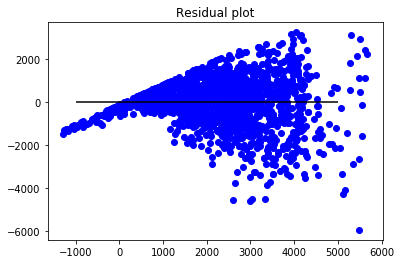

In [35]:
x_plot = plt.scatter(pred_test, (pred_test - y_test), c='b') 
plt.hlines(y=0, xmin= -1000, xmax=5000) 
plt.title('Residual plot')

#### There were a lot of features with very high and low values weighing the line too much (called residuals). 
This shape indicates Heteroskedasticity. The presence of non-constant variance in the error terms results in heteroskedasticity. We can clearly see that the variance of error terms(residuals) is not constant. Generally, non-constant variance arises in presence of outliers or extreme leverage values. These values get too much weight, thereby disproportionately influencing the model’s performance. When this phenomenon occurs, the confidence interval for out of sample prediction tends to be unrealistically wide or narrow.

## 4.4 Training the coefficients

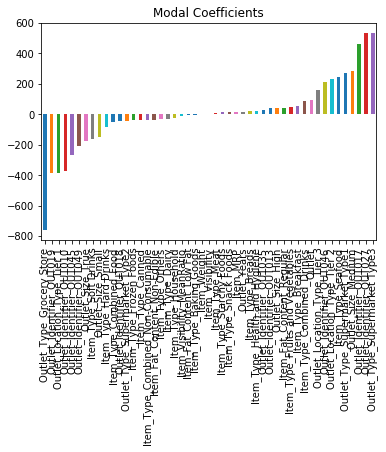

In [36]:
#Let's see the coefs as they are.
predictors = x_train.columns
coef = Series(lm.coef_,predictors).sort_values()

coef.plot(kind='bar', title='Modal Coefficients')

#### We can see that coefficients of Outlet_Identifier_OUT027 and Outlet_Type_Supermarket_Type3 (last 2) is much higher as compared to rest of the coefficients. Therefore the total sales of an item would be more driven by these two features.

# Step 5: Other Types of Regression

## 5.1 Ridge Regression

### Let us first implement it on our above problem and check our results that whether it performs better than our linear regression model.

In [45]:
#Training the model
ridgeReg = linear_model.Ridge(alpha=.5, normalize=True)
ridgeReg.fit(x_train,y_train)


rr100 = linear_model.Ridge(alpha=100)
rr100.fit(x_train, y_train)
Ridge_test_score100 = rr100.score(x_test, y_test)
Ridge_train_score100 = rr100.score(x_train, y_train)

Ridge_train_score = ridgeReg.score(x_train, y_train)
Ridge_test_score = ridgeReg.score(x_test, y_test)

pred = ridgeReg.predict(x_test)
mse = np.mean((pred_test - y_test)**2)

In [38]:
#NEED TO CALCULATE INDIVIDUAL MSE

print("linear regression train score:", train_score)
print("linear regression test score:", test_score)
print("ridge regression train score low alpha:", Ridge_train_score)
print("ridge regression test score low alpha:", Ridge_test_score)
print("ridge regression train score high alpha:", Ridge_train_score100)
print("ridge regression test score high alpha:", Ridge_test_score100)
print('MSE',mse)

linear regression train score: 0.5615933607025128
linear regression test score: 0.570153227853309
ridge regression train score low alpha: 0.5198592806078093
ridge regression test score low alpha: 0.5228331465846584
ridge regression train score high alpha: 0.5607707396134334
ridge regression test score high alpha: 0.569186248547177
MSE 1249977.3828182267


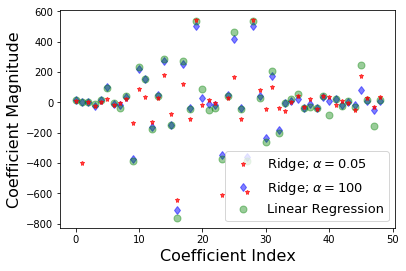

In [39]:
plt.plot(ridgeReg.coef_,alpha=0.7,linestyle='none',marker='*',markersize=5,color='red',label=r'Ridge; $\alpha = 0.05$',zorder=7)
plt.plot(rr100.coef_,alpha=0.5,linestyle='none',marker='d',markersize=6,color='blue',label=r'Ridge; $\alpha = 100$')
plt.plot(lm.coef_,alpha=0.4,linestyle='none',marker='o',markersize=7,color='green',label='Linear Regression')
plt.xlabel('Coefficient Index',fontsize=16)
plt.ylabel('Coefficient Magnitude',fontsize=16)
plt.legend(fontsize=13,loc=4)
plt.show()

## 5.2 Lasso Regression 

### LASSO (Least Absolute Shrinkage Selector Operator), is quite similar to ridge.

In [40]:
lassoReg = linear_model.Lasso(alpha=0.3, normalize=True)

lassoReg.fit(x_train,y_train)

pred = lassoReg.predict(x_test)

# calculating mse

mse = np.mean((pred_test - y_test)**2)

print(mse)

lasso_score = lassoReg.score(x_test,y_test)
lasso_score

1249977.3828182267


0.5692746481342323

In [41]:
#NEED COEFF MODEL

### Both the mse and the value of R-square for our model has been increased. Therefore, lasso model is predicting better than both linear and ridge.
So, we can see that even at small values of alpha, the magnitude of coefficients have reduced a lot. By looking at the plots, can you figure a difference between ridge and lasso?

We can see that as we increased the value of alpha, coefficients were approaching towards zero, but if you see in case of lasso, even at smaller alpha’s, our coefficients are reducing to absolute zeroes. Therefore, lasso selects the only some feature while reduces the coefficients of others to zero. This property is known as feature selection and which is absent in case of ridge.

## 5.3 Elastic Net Regression

### Before going into the theory part, let us implement this too in big mart sales problem. Will it perform better than ridge and lasso? Let’s check!

In [42]:
ENreg = linear_model.ElasticNet(alpha=1, l1_ratio=0.5, normalize=False)

ENreg.fit(x_train,y_train)

pred_test = ENreg.predict(x_test)
en_score = ENreg.score(x_test,y_test)
print(en_score)

mse = np.mean((pred_test - y_test)**2)

mse

0.4766667662122172


1521832.309324897

In [43]:
#NEED COEFF MODEL

### So we get the value of R-Square, which is very less than both ridge and lasso. The reason behind this downfall is basically we didn’t have a large set of features.

Elastic net is basically a combination of both L1 and L2 regularization. So if you know elastic net, you can implement both Ridge and Lasso by tuning the parameters.